<a href="https://colab.research.google.com/github/AmandaAntonio/Analise_de_dados_Airbnb_Boston/blob/main/Analisando_os_Dados_do_Airbnb_%7C_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





 
 # <center>Airbnb em Boston: Acomodações no berço da independêcia americana</center>

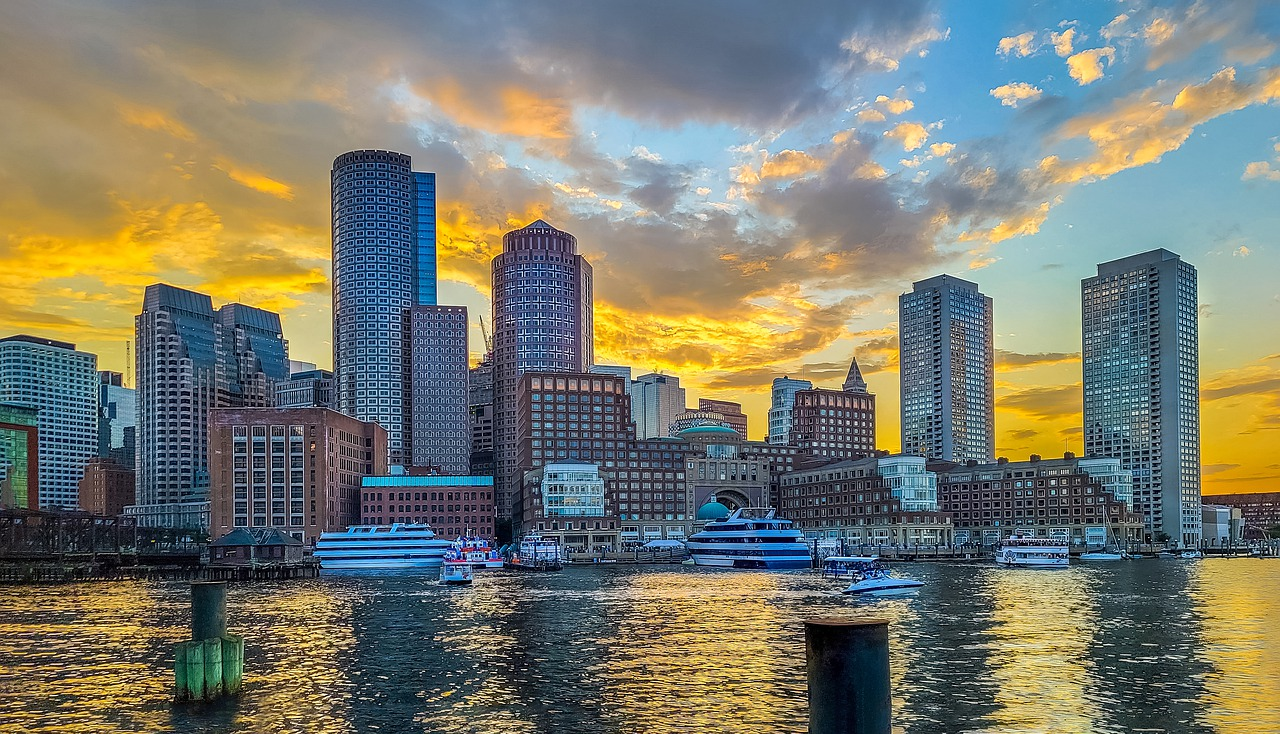

Fundada em 1630 por colonizadores ingleses, está localizada na região nordeste estadunidense denominada [Nova Inglaterra](https://pt.wikipedia.org/wiki/Nova_Inglaterra) (em ingles: New England), Boston é a capital e a cidade mais populosa do estado de Massachussetts.

Com aproximadamente 700.000 habitantes, possui uma comunidade brasileira expressiva e atrai pessoas do mundo todo sendo uma cidade global com um extenso centro financeiro, comercial, industrial e universitário.

**O que é o Airbnb?**

Segundo o site da empresa o Airbnb é uma plataforma que conecta viajantes em busca de acomodação a pessoas interessadas em alugar seu quarto ou imóvel disponível para obter uma renda extra.

Com o uso da tecnologia, milhões de pessoas podem compartilhar seus lares e se beneficiar economicamente de sua hospitalidade.

Neste modelo de negócio o Airbnb consagrou-se como a maior empresa hoteleira do mundo, sem possuir nenhum hotel e hoje, dez anos após sua fundação, registra mais de 400 milhões de hospedagem em mais de 81.000 cidades em 191 países.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Nesta análise, foi analisado os dados referentes à cidade Boston, para ver quais insights podem ser extraídos a partir de dados brutos.


## Obtenção dos Dados
O Airbnb tem como iniciativa disponibilizar dados do site, nesta análise os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e foi baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Boston (good for visualisations).*


In [37]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/listings.csv')

## Análise dos Dados
O objetivo desta etapa é criamos uma consciência situacional inicial dos dados e entender com eles estão estruturados.

**Dicionário das variáveis**

* id - número de identificação do imóvel
* name - nome no anúncio da propriedade 
* host_id - número de identificação do proprietário (anfitrião) da propriedade
* host_name - nome do anfitrião
* neighbourhood_group - não apresentar nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - tipo do quarto oferecido
* price - preço para alugar o imóvel
* minimum_nights - minimo de noite para alugar o imóvel
* number_of_reviews - número de avaliações que imóvel possui
* last_review - data da última avaliação
* reviews_per_month - quantidade de avaliações por mês
* calculated_host_listings_count - quantidade imóveis do mesmo anfitrião
* availability_365 - número de dias disponiveis dentro de 365 dias
* number_of_reviews_ltm - número de avaliações no último ano
* license - tipo de licenciamento comercial do imóvel


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [39]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,21,2021-07-25,0.27,1,17,4,NaN
1,5506,** Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,99,3,110,2021-10-25,0.71,10,75,3,Approved by the government
2,6695,Home Away from Home! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.77,10,127,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,80,91,25,2020-04-15,0.28,6,244,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,95,91,32,2020-04-16,0.21,6,314,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* que estamos utilizando é versão 'resumida' dos atributos tabelados sobre Boston no Airbnb, porém no mesmo portal é possivel encontrar a versão completa dos dados.

In [40]:
# identificar o volume de dados do DataFrame
print ('Entradas:\t {}'. format(df.shape[0]))
print ('Váriaveis :\t {}'. format(df.shape[1]))

# verificar as variáveis do dataset
display(df.dtypes)

Entradas:	 3349
Váriaveis :	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [41]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.447895
reviews_per_month                 0.298298
last_review                       0.298298
host_name                         0.097044
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [42]:
# verificar valores duplicados
df.duplicated().value_counts()

False    3349
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

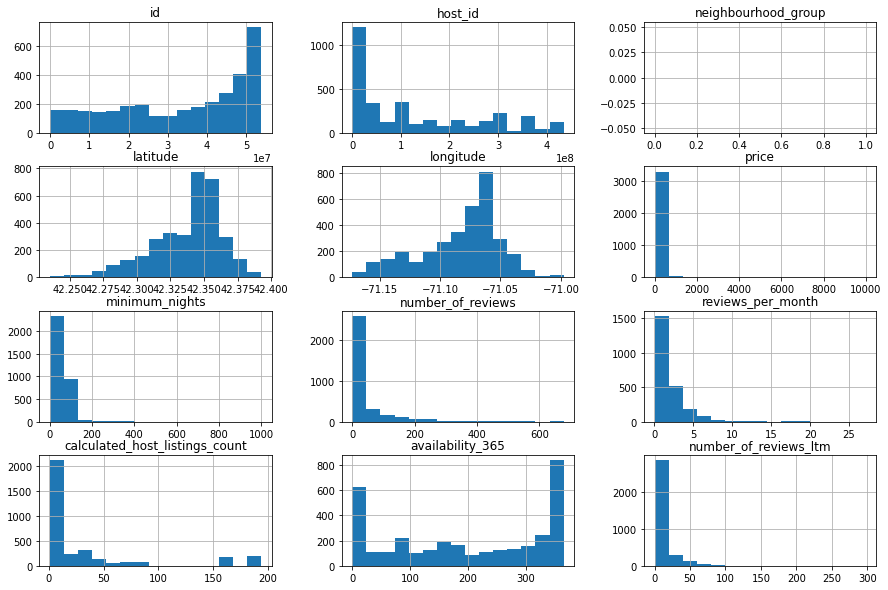

In [43]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
 Pela distribuição dos dados do dataframe através do histograma é possivel perceber indícios da presença de outliers.
As colunas price, minimum_nights e calculated_host_listings_count por exemplo, apresentam desvio da distribuição dos valores evidenciando distorção gráfica.


Para ver mais detalhadamente será utilizado o metódo ***describe()*** e o gráfico Boxplot para auxiliar na persecpção de outliers e das distorções presentes.

#### Método ***describe( )***

In [44]:
# resumo estátistico das variáveis númericas
df[['price','minimum_nights','number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3349.000000,3349.000000,3349.000000,2350.000000,3349.000000,3349.000000,3349.000000
mean,168.231114,39.084801,38.313228,1.701140,32.065990,197.484921,8.187220
std,262.049196,46.164722,75.073720,2.068519,55.398099,137.290064,18.424485
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,75.000000,2.000000,0.000000,0.260000,1.000000,70.000000,0.000000
50%,126.000000,29.000000,6.000000,1.000000,6.000000,200.000000,0.000000
75%,200.000000,91.000000,40.000000,2.467500,31.000000,341.000000,7.000000
max,10000.000000,1000.000000,678.000000,27.170000,194.000000,365.000000,298.000000


Olhando o resumo estático acima é possível afirmar que:

1.   75% dos preços estão abaixo de 200 dolares.
2.   A quantidade máxima de noites ultapassam 365 dias (1 ano) e 75% estão abaixo de 91 dias mínimos para locação.
3.  75% dos anfitriões tem até 31 imóveis listados.
4. O desvio padrão é elevado em algumas variáveis o que indica grande flutuação de valores em relação a média apresentada.

#### Boxplot para a coluna Price utilizando a média.

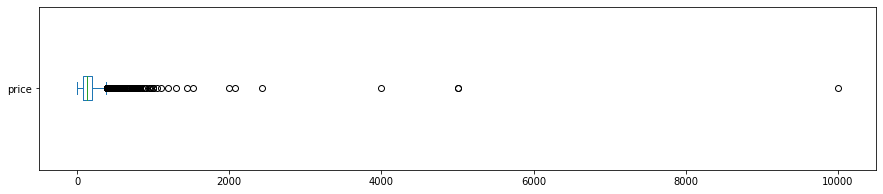

price: valores acima de 168 dolares
1156 entradas
34.52%


In [45]:
# Gráfico Boxplot coluna price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 168 dolares para price
print('price: valores acima de 168 dolares')
print("{} entradas".format(len(df[df.price > 168])))
print("{:.2f}%".format((len(df[df.price > 168]) / df.shape[0])*100))

#### Boxplot para coluna Minimum Nights utilizando a média

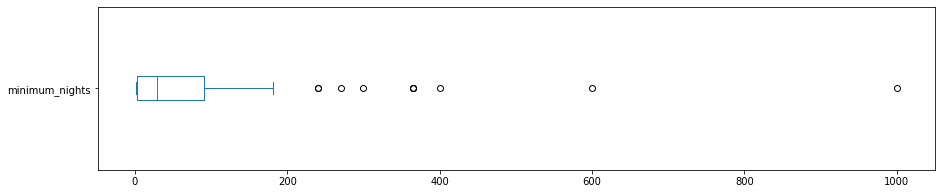

minimum_nights: valores acima de 39 noites
1038 entradas
30.99%


In [46]:
# Gráfico Boxplot coluna minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 39 dias para minimum_nights
print('minimum_nights: valores acima de 39 noites')
print("{} entradas".format(len(df[df.minimum_nights > 39])))
print("{:.2f}%".format((len(df[df.minimum_nights > 39]) / df.shape[0])*100))

#### Boxplot para coluna Calculated Host Listings Count utilizando a média

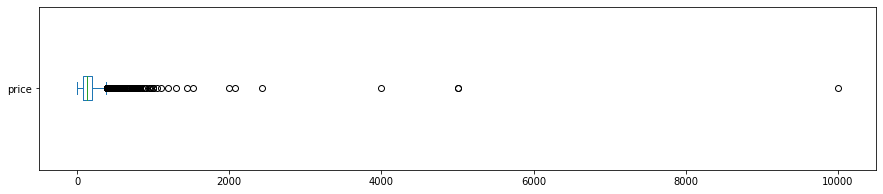

calculated_host_listings_count: valores acima de 32 imóveis
802 entradas
23.95%


In [47]:
# Gráfico Boxplot coluna calculated_host_listings_count
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de anfitriões com mais de 32 imóveis
print('calculated_host_listings_count: valores acima de 32 imóveis')
print("{} entradas".format(len(df[df.calculated_host_listings_count > 32])))
print("{:.2f}%".format((len(df[df.calculated_host_listings_count > 32]) / df.shape[0])*100))

#### Outiliers 
Verificando os histogramas e Boxplots, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos para as colunas price e calculated_host_listings_count:

1. Considerar o desvio padrão.
2. Somar a mediana e o desvio padrão da variável para ter o limite.
3. Remover os outliers baseado no limite.


In [48]:
#ver o limite de corte de price
desvio_price = df.price.std()
mediana_price = df.price.median()
print('O limite price é {:.2f}'.format(desvio_price + mediana_price))


O limite price é 388.05


In [49]:
# ver quantidade de valores acima de 430.28 dolares para price
print('price: valores acima de 388.05 dolares')
print("{} entradas".format(len(df[df.price > 388.05])))
print("{:.2f}%".format((len(df[df.price > 388.05]) / df.shape[0])*100))

price: valores acima de 388.05 dolares
164 entradas
4.90%


In [50]:
#ver o limite de corte calculated_host_listings_count
desvio_host_listings = df.calculated_host_listings_count.std()
mediana_host_listings = df.calculated_host_listings_count.median()
print('O limite host listings é {:.0f}'.format(desvio_host_listings + mediana_host_listings))

O limite host listings é 61


In [51]:
# ver quantidade de anfitriões com mais de 87 imóveis
print('calculated_host_listings_count: valores acima de 61 imóveis')
print("{} entradas".format(len(df[df.calculated_host_listings_count > 61])))
print("{:.2f}%".format((len(df[df.calculated_host_listings_count > 61]) / df.shape[0])*100))

calculated_host_listings_count: valores acima de 61 imóveis
509 entradas
15.20%


#### Outiliers 
Depois de realizar testes (IQR, mediana+desvio padrão) para determinar os outliers, foi decido utilizar o percentil de 75 como limite de corte para coluna minimum_nights.

Uma hipótese para altos valores para minimo de noites pode ser influência de impostos relacionados ao tempo de estadia. Para entender melhor sobre os impostos em Boston. [clique aqui](https://www.airbnb.com.br/help/article/2587/recolhimento-e-repasse-de-impostos-de-ocupa%C3%A7%C3%A3o-pelo-airbnb-em-massachusetts).

In [52]:
# ver quantidade de valores acima de 91 dias para minimum_nights
print('minimum_nights: valores acima de 91 noites')
print("{} entradas".format(len(df[df.minimum_nights > 91])))
print("{:.2f}%".format((len(df[df.minimum_nights > 91]) / df.shape[0])*100))

minimum_nights: valores acima de 91 noites
92 entradas
2.75%


#### Histogramas 
 Limpar o *DataFrame* dos outliers e das colunas que não serão usadas e plotar novamente o histograma.
 

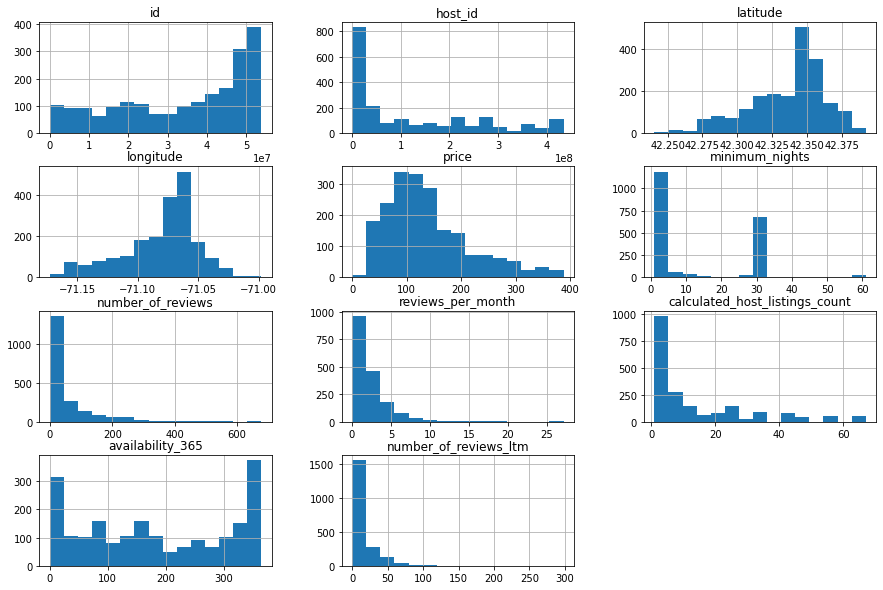

In [53]:
# remover os *outliers* em um novo DataFrame
df2 = df.copy()
df2.drop(df2[df2.price > 388.05 ].index, axis=0, inplace=True)
df2.drop(df2[df2.minimum_nights > 61].index, axis=0, inplace=True)
df2.drop(df2[df2.calculated_host_listings_count > 87].index, axis=0, inplace=True)

# remover colunas que não serão utilizadas
df2.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df2.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas, basicamente estamos buscando elo ou afinidade entre duas variáveis e pelo coeficiente de correlação estabelecer qual a intensidade. 

Para identificar as correlações existentes entre as variáveis de interesse, vou:

1. Criar uma matriz de correlação
2. Gerar um *heatmap* a partir dessa matriz.

In [54]:
# criar uma matriz de correlação
corr = df2[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.053236,-0.059193,0.028622,-0.008230,0.110569
minimum_nights,-0.053236,1.000000,-0.166948,-0.351407,0.034222,0.026115
number_of_reviews,-0.059193,-0.166948,1.000000,0.512664,-0.136281,-0.028398
reviews_per_month,0.028622,-0.351407,0.512664,1.000000,-0.007780,0.021060
calculated_host_listings_count,-0.008230,0.034222,-0.136281,-0.007780,1.000000,0.112348
availability_365,0.110569,0.026115,-0.028398,0.021060,0.112348,1.000000


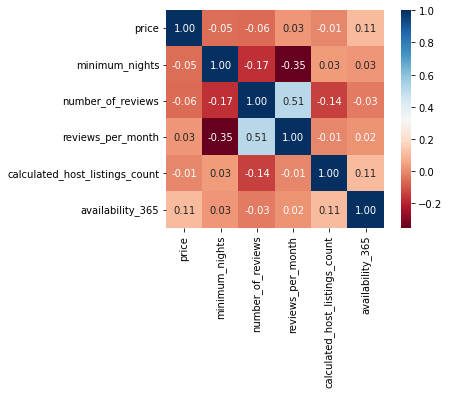

In [55]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual a média dos preços de aluguel?**

Conferir se ocorreu mudanças de preço das locações, valor inicial era 168.23 dólares

In [56]:
# ver a média da coluna price
price_mean = df2.price.mean()
print (' A média de preço da coluna price é {:.2f} dólares'.format(price_mean))

 A média de preço da coluna price é 139.60 dólares


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna room_type específica o tipo da locação anunciada. Se você conhece o Airbnb sabe que existem alternativas de acomodação e aqui vamos identifica - las.

In [57]:
# mostrar a quantidade de cada tipo de imóvel disponível
df2.room_type.value_counts()

Entire home/apt    1287
Private room        717
Hotel room           22
Shared room           5
Name: room_type, dtype: int64

In [58]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df2.room_type.value_counts()/df2.shape[0]

Entire home/apt    0.633678
Private room       0.353028
Hotel room         0.010832
Shared room        0.002462
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

No caso, será comparados os bairros (neighbourhoods) a partir do preço de locação.



***Antes vamos conhecer os bairros da cidade de Boston***

No mapa é mostrado a separação oficial em 23 bairros, pois alguns deles por serem grandes possuem áreas menores, chamadas ***subdistritos*** que somados totalizam 84 sub-áreas.

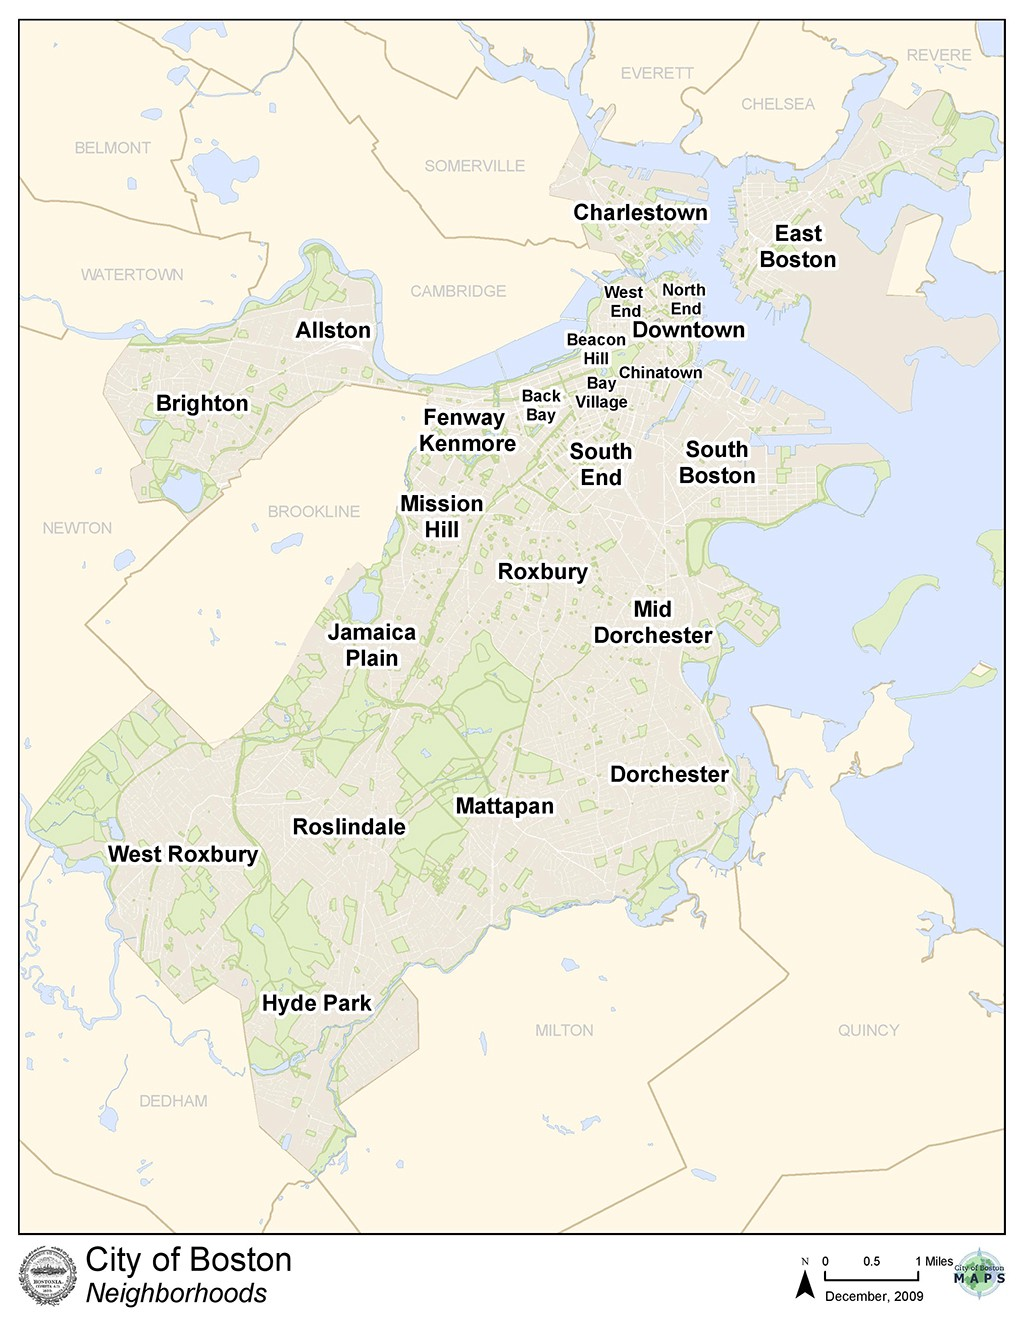




Boston como na maioria das cidades pelo mundo, tem em sua região central os maiores preços da cidade. Essa área por apresentar grande diversidade cultural, atrações artísticas, parques, estádios, teatro, museu, cinema e especialmente parte da história dos Estados Unidos geram forte apelo social/comercial sendo responsável pelo alto custo.

Sobre o Airbnb no local é importante destacar que no estado de Massachusetts os anfitriões são obrigados a registrar suas acomodações no Departamento de Receita do Estado para recolhimento de impostos.

[Clicando aqui](https://www.airbnb.com.br/help/article/2587/recolhimento-e-repasse-de-impostos-de-ocupa%C3%A7%C3%A3o-pelo-airbnb-em-massachusetts) você será direcionado a central de ajuda que contém todas as informações de Recolhimento e Repasse de Impostos de Ocupação pelo Airbnb em Massachusetts.


---

***Curiosidades***

Caso tem interesse em saber um pouco sobre cada bairro, 2 brasileiros que moram em Boston a Luciane e o Otávio fizeram em seu blog Roteiros e Relatos um guia da cidade por bairro, para dar um conferida clique [aqui](https://medium.com/@roteiroserelatos/guia-de-boston-bairro-a-bairro-d7eec5381497).


Já a empresa Mass Bayer Movers publicou um texto em seu site, onde é apontado os bairros mais ricos de Boston e informações como preço média das casas e renda média familiar do bairro. Veja [aqui](https://massbaymovers.com/blog/richest-neighborhoods-in-boston/).

In [59]:
# ver preços por bairros, na média
df2.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Chinatown                  241.222222
Longwood Medical Area      219.000000
Charlestown                189.735849
Back Bay                   180.744000
North End                  180.400000
Fenway                     177.142857
Downtown                   175.662162
Beacon Hill                152.844444
South End                  151.078212
South Boston Waterfront    148.307692
Name: price, dtype: float64

Acima, vemos que bairros como Chinatown, South Boston, Charleston estão com média de preço superior a região central (Downtown) o que gera estranhamento.

Só para dar um único exemplo de como uma amostra pode estar enviesada, veja quantas entradas há para Chinatown.

In [60]:
# mostrar a quantidade de imóveis em Chinatown
print(df2[df2.neighbourhood == 'Chinatown'].shape)

# visualizar as entradas
df2[df2.neighbourhood == 'Chinatown']

(18, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
745,17559493,"NEW 2nd Floor, 2BR Downtown Boston",118122992,Billy,Chinatown,42.34903,-71.06200,Entire home/apt,300,3,174,2021-11-14,3.01,4,146,12,STR-414537
746,17559756,"NEW 3rd Floor, 2BR Downtown Boston",118122992,Billy,Chinatown,42.35030,-71.06037,Entire home/apt,300,3,141,2021-11-14,2.44,4,145,8,STR-414541
747,17559846,NEW B 1BR Downtown Boston,118122992,Billy,Chinatown,42.34835,-71.06039,Entire home/apt,125,29,209,2021-10-15,3.61,4,349,1,NaN
749,17573922,"NEW 1st Floor, 1BR Downtown Boston",118122992,Billy,Chinatown,42.34986,-71.06197,Entire home/apt,160,29,144,2021-10-03,2.49,4,243,2,NaN
1481,34279736,Lavish Boston Studio Apt Near Prudential Center!,163251048,Jen,Chinatown,42.35175,-71.05926,Entire home/apt,169,29,0,NaN,NaN,11,359,0,Approved by government
1986,44060731,Spacious 1 BR | Laundry | WiFi | Full Kitchen ...,9419684,Churchill,Chinatown,42.35147,-71.06019,Entire home/apt,265,29,0,NaN,NaN,32,365,0,Approved by government
1987,44131827,Modern 1 BR | Full kitchen | GYM | Washer/D | GLS,9419684,Churchill,Chinatown,42.35135,-71.06130,Entire home/apt,265,29,0,NaN,NaN,32,365,0,Approved by government
1991,44133273,Luxury 1 BR | Full kitchen | GYM | Washer/D | GLS,9419684,Churchill,Chinatown,42.35180,-71.06170,Entire home/apt,265,29,0,NaN,NaN,32,365,0,Approved by government
1992,44133942,Brand New 1 BR | Full Kitchen | GYM |Washer/D ...,9419684,Churchill,Chinatown,42.35120,-71.06109,Entire home/apt,265,29,0,NaN,NaN,32,365,0,Approved by government
1995,44135035,Exclusive 2BR | Furnished | Gym | Boston | GLS,9419684,Churchill,Chinatown,42.35131,-71.06037,Entire home/apt,369,29,0,NaN,NaN,32,365,0,Approved by government


In [61]:
# mostrar a quantidade de imóveis em Downtown
print(df2[df2.neighbourhood == "Downtown"].shape)

# visualizar as entradas
df2[df2.neighbourhood == 'Downtown']

(222, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
57,820073,"Modern Loft, 1700 SqFt. Location!",1911807,Kelly & Chris,Downtown,42.355800,-71.061040,Entire home/apt,230,6,78,2020-03-03,0.74,2,0,0,STR-411359
507,12269155,Boston Apartment (North End),66084480,Richard,Downtown,42.363320,-71.058970,Entire home/apt,90,29,394,2021-11-23,5.70,1,320,4,STR-409365
528,12898177,1 Bedroom with Pool Access in Heart of Downtow...,22541573,Ken,Downtown,42.359240,-71.058650,Entire home/apt,140,32,5,2019-09-25,0.10,27,353,0,NaN
618,14472483,Sonder | Financial District | Stunning 2BR,12243051,NaN,Downtown,42.358830,-71.054420,Entire home/apt,175,30,86,2019-12-07,1.34,8,127,0,NaN
631,14744525,Sonder | Financial District | Modern 2BR,12243051,NaN,Downtown,42.358000,-71.053180,Entire home/apt,175,30,52,2019-09-12,0.81,8,127,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,53775571,"Awaiting for your Next Stay, Book now 403!",183914990,Edmund,Downtown,42.355970,-71.061130,Entire home/apt,83,2,0,NaN,NaN,12,360,0,STR-439290
3326,53775865,404 Monthly Discounts See you,183914990,Edmund,Downtown,42.353971,-71.062839,Entire home/apt,102,2,0,NaN,NaN,12,353,0,STR-439290
3328,53785663,Big Saving Affordable Stay in Boston. Close to...,183914990,Edmund,Downtown,42.353977,-71.062978,Entire home/apt,101,2,0,NaN,NaN,12,359,0,STR-439290
3329,53787160,Come Visit Boston and Stay in our Homey Studio...,183914990,Edmund,Downtown,42.355490,-71.061200,Entire home/apt,92,3,0,NaN,NaN,12,355,0,STR-439290


Ao analisar cada bairro separadamente e possível notar que Chinatown apresenta uma amostra pequena e não-representativa, em relação a Downtown.

----

Visto que o Dataframe apresenta coordenadas de latitude e longitude, é possível plotar cada ponto e ver a distribuição dos imóveis ao longo de Boston.

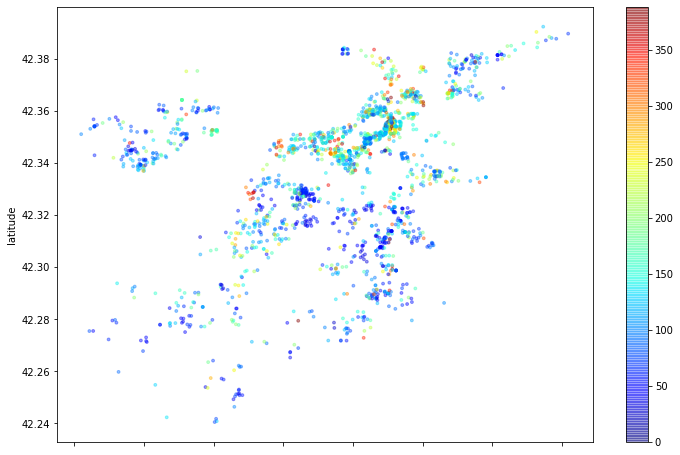

In [62]:
# plotar os imóveis pela latitude-longitude
df2.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df2['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Conferir se ocorreu mudanças com média inicial de 39 noites.


In [63]:
# ver a média da coluna minimum_nights
min_nights_mean = df2.minimum_nights.mean()
print('A média mínima de noites é de {:.0f} diárias'.format(min_nights_mean))

A média mínima de noites é de 13 diárias


## Conclusões


Boston foi cenário de movimentos políticos mais significativos da história do país e hoje é uma das melhores cidades para se viver nos Estados Unidos .

Nesta simples análise, nota-se brevemente características das acomodações da cidade, a título de exemplo, a média mínima de noites com 13 diárias e média de preço 139.60 dólares. Já o tipo de imóvel mais listado, são casas/apartamentos inteiros que lideram com 63% seguido de quartos privados com 35% de listagens.

Os hóspedes que reservarem acomodações do Airbnb localizadas no Estado de Massachusetts pagarão impostos como parte de sua reserva os quais podem interferir nas características das acomodações vistas na análise.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos e constou-se que existem outliers em algumas das variáveis.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com mais atributos disponíveis.

